## Importing Dependencies

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import gzip
import os
from PIL import Image
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import scipy.sparse
import tensorflow as tf
%matplotlib inline

## PreProcessing USPS Dataset

In [158]:
USPSMat  = []
USPSTar  = []
USPSMatNew  = []
USPSTarNew  = []
curPath  = 'USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    #print(j)
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((20, 20))
            imgData = (255-np.array(img.getdata()))/255
            USPSMat.append(imgData)
            USPSTar.append(j)
            new_im = Image.new("P", (28,28), (255))
            new_im.paste(img, (4,4))
            savedImg = new_im
            new_imData = (255-np.array(new_im.getdata()))/255
            USPSMatNew.append(new_imData)
            USPSTarNew.append(j)


## Generating USPS Training and Testing Dataset

In [159]:
X_USPS = USPSMatNew
y_USPS = USPSTarNew
print(len(X_USPS))
print(len(Y_USPS))
print(len(X_USPS[0]))
print(Y_USPS[0])
X_USPS = np.asarray(USPSMatNew)
X_USPS = np.append(arr=np.ones((19999,1)).astype(int),values=X_USPS,axis=1)
X_USPS = X_USPS.T
Y_USPS = np.asarray(USPSTarNew)
Y_USPS = Y_USPS.reshape(-1, 1)
onehotencoder = OneHotEncoder(categorical_features=[0])
Y_USPS = onehotencoder.fit_transform(Y_USPS).toarray()
print(X_USPS.shape)
print(Y_USPS.shape)

19999
19999
784
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(785, 19999)
(19999, 10)


## Generating MNIST Training and Testing Dataset

In [160]:
filename = 'mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
f.close()
temp = test_data[1]

#Training Data
X_train = np.asarray(training_data[0])
X_train = np.append(arr=np.ones((50000,1)).astype(int),values=X_train,axis=1)
x_train = X_train.T
y_train = np.asarray(training_data[1])
y_train = y_train.reshape(y_train.shape[0],1)
onehotencoder = OneHotEncoder(categorical_features=[0])
y_train = onehotencoder.fit_transform(y_train).toarray()
y_train = y_train.T

#Validation Data
X_val = np.asarray(validation_data[0])
X_val = np.append(arr=np.ones((10000,1)).astype(int),values=X_val,axis=1)
x_val = X_val.T
y_val = np.asarray(validation_data[1])
y_val = y_val.reshape(y_val.shape[0],1)
onehotencoder = OneHotEncoder(categorical_features=[0])
y_val = onehotencoder.fit_transform(y_val).toarray()


#Testing Data
X_test = np.asarray(test_data[0])
X_test = np.append(arr=np.ones((10000,1)).astype(int),values=X_test,axis=1)
x_test = X_test.T
y_test = np.asarray(test_data[1])
y_test = y_test.reshape(y_test.shape[0],1)
onehotencoder = OneHotEncoder(categorical_features=[0])
y_test = onehotencoder.fit_transform(y_test).toarray()

## Function Declarations

In [161]:
def oneHotIt(Y):
    m = Y.shape[0]
    OHX = scipy.sparse.csr_matrix((np.ones(m), (Y, np.array(range(m)))))
    OHX = np.array(OHX.todense()).T
    return OHX

def getLoss(w,x,y,lam):
    m = x.shape[0]
    y_mat = y.T
    scores = np.dot(x.T,w)
    prob = softmax(scores)
    loss = (-1 / m) * np.sum(y_mat * np.log(prob)) + (lam/2)*np.sum(w*w)
    grad = (-1 / m) * np.dot(x,(y_mat - prob)) + lam*w
    return loss,grad

def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

## Logistic Regression

In [162]:
w = np.zeros([X_train.shape[1],10])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(0,iterations):
    loss,grad = getLoss(w,x_train,y_train,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

113.20023424811879


## Plotting Graphs

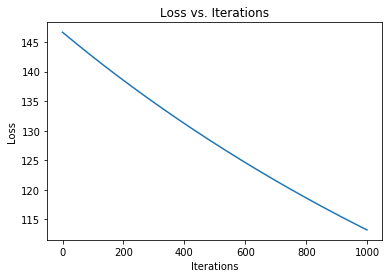

In [167]:
fig, ax = plt.subplots()
ax.plot(losses)
ax.set_xlabel('Iterations')  
ax.set_ylabel('Loss')  
ax.set_title('Loss vs. Iterations')
fig.savefig("logistic.png")


## Accuracy Calculation

In [168]:
def getAccuracy(someX,someY):
    count = 0
    prob,prede = getProbsAndPreds(someX.T)
    prede = oneHotIt(prede)
    accuracy = sum(prede == someY)/(float(len(someY)))
    accuracy = np.average(accuracy)
    return accuracy

In [171]:
print('Training Accuracy: ', getAccuracy(x_train,y_train.T))
print('Validation Accuracy: ', getAccuracy(x_val,y_val))
print('Test Accuracy: ', getAccuracy(x_test,y_test))
prob,prede = getProbsAndPreds(x_test.T)
np.savetxt("logistic.csv", prede, delimiter=",")
np.savetxt("actual.csv", y_test, delimiter=",")
print('USPS Accuracy: ',getAccuracy(X_USPS,Y_USPS))
prob,prede2 = getProbsAndPreds(X_USPS.T)
np.savetxt("logistic_usps.csv", prede2, delimiter=",")
np.savetxt("actual_usps.csv", Y_USPS, delimiter=",")

Training Accuracy:  0.9509879999999999
Validation Accuracy:  0.95464
Test Accuracy:  0.95322
USPS Accuracy:  0.863763188159408
